Purpose:
    Demonstrates how to use `seisvis` for visualizing field seismic data.
    If you do not have access to field data, you can still refer to the 
    example sections to understand how the plotting functions work.

In [1]:
import numpy as np
import pandas as pd
from seisvis import plot2d, plot1d, plot3d
from seisvis.plot_config import PlotConfig
from seisvis.data_config import DataCube

Prepare Data

In [2]:
# Properties and Seismic data
prop = np.load('datasets/test_data.npy')
seismic_data = np.load('datasets/test_seismic.npy')

# data information
line_starnum = 400    # replace your actual inline start
trace_starnum = 1500  # replace your actual xline start
t_starnum = 2000      # replace your actual xline start
dt = 0.001

il = np.arange(line_starnum, line_starnum+seismic_data.shape[0], 1)
xl = np.arange(trace_starnum, trace_starnum+seismic_data.shape[1], 1)
t = np.arange(t_starnum, t_starnum+seismic_data.shape[-1], 1)

nil, nxl, nt = seismic_data.shape
il_start, il_end = il[0], il[-1]
xl_start, xl_end = xl[0], xl[-1]

# Horizons
mid = pd.read_csv("datasets/rough_horizon.csv")
mid['Z'] = mid['Z'] / dt  # Convert from time (s) to time index (samples)

# Generate synthetic (fake) horizons by shifting the mid horizon
# These are often useful for visualization or testing
top = mid.copy()
top['Z'] = top['Z'] - 100 
base = mid.copy()
base['Z'] = base['Z'] + 25  

m1 = np.array(top['Z'])
m2 = np.array(mid['Z'])
m3 = np.array(base['Z'])

# Well logs (assume there are wells at these positions)
well_pos_inline = 450, 477, 566, 655, 639, 512
well_pos_xline = 1540, 1575, 1640, 1688, 1700, 1750
well_pos = np.array([well_pos_inline, well_pos_xline])
well1  = prop[well_pos[0,0]-line_starnum, well_pos[1,0]-trace_starnum, :].reshape(-1,1)
well2  = prop[well_pos[0,1]-line_starnum, well_pos[1,1]-trace_starnum, :].reshape(-1,1)
well3  = prop[well_pos[0,2]-line_starnum, well_pos[1,2]-trace_starnum, :].reshape(-1,1)
well4  = prop[well_pos[0,3]-line_starnum, well_pos[1,3]-trace_starnum, :].reshape(-1,1)
well5  = prop[well_pos[0,4]-line_starnum, well_pos[1,4]-trace_starnum, :].reshape(-1,1)

# Define individual wells as dictionaries, each containing:
# - 'log': the well log data
# - 'coord': the spatial location of the well (e.g., [inline, crossline])
well_1 = {'log':well1, 'coord':well_pos[:,0]}
well_2 = {'log':well2, 'coord':well_pos[:,1]}
well_3 = {'log':well3, 'coord':well_pos[:,2]}
well_4 = {'log':well4, 'coord':well_pos[:,3]}
well_5 = {'log':well5, 'coord':well_pos[:,4]}

print('Seismic amplitude data information \n=====================================================')
print('Shape of data [n_il, n_xl, n_samples]: ', nil, nxl, nt)
print('Inline start:', il_start, '    ', 'Inline end:', il_end)
print('Crossline start:', xl_start, '    ', 'Crossline end:', xl_end)
print('Sample rate [ms]:', dt*1000)


Seismic amplitude data information 
Shape of data [n_il, n_xl, n_samples]:  300 300 300
Inline start: 400      Inline end: 699
Crossline start: 1500      Crossline end: 1799
Sample rate [ms]: 1.0


Section 1: 1D Plot (Here we just use random data)

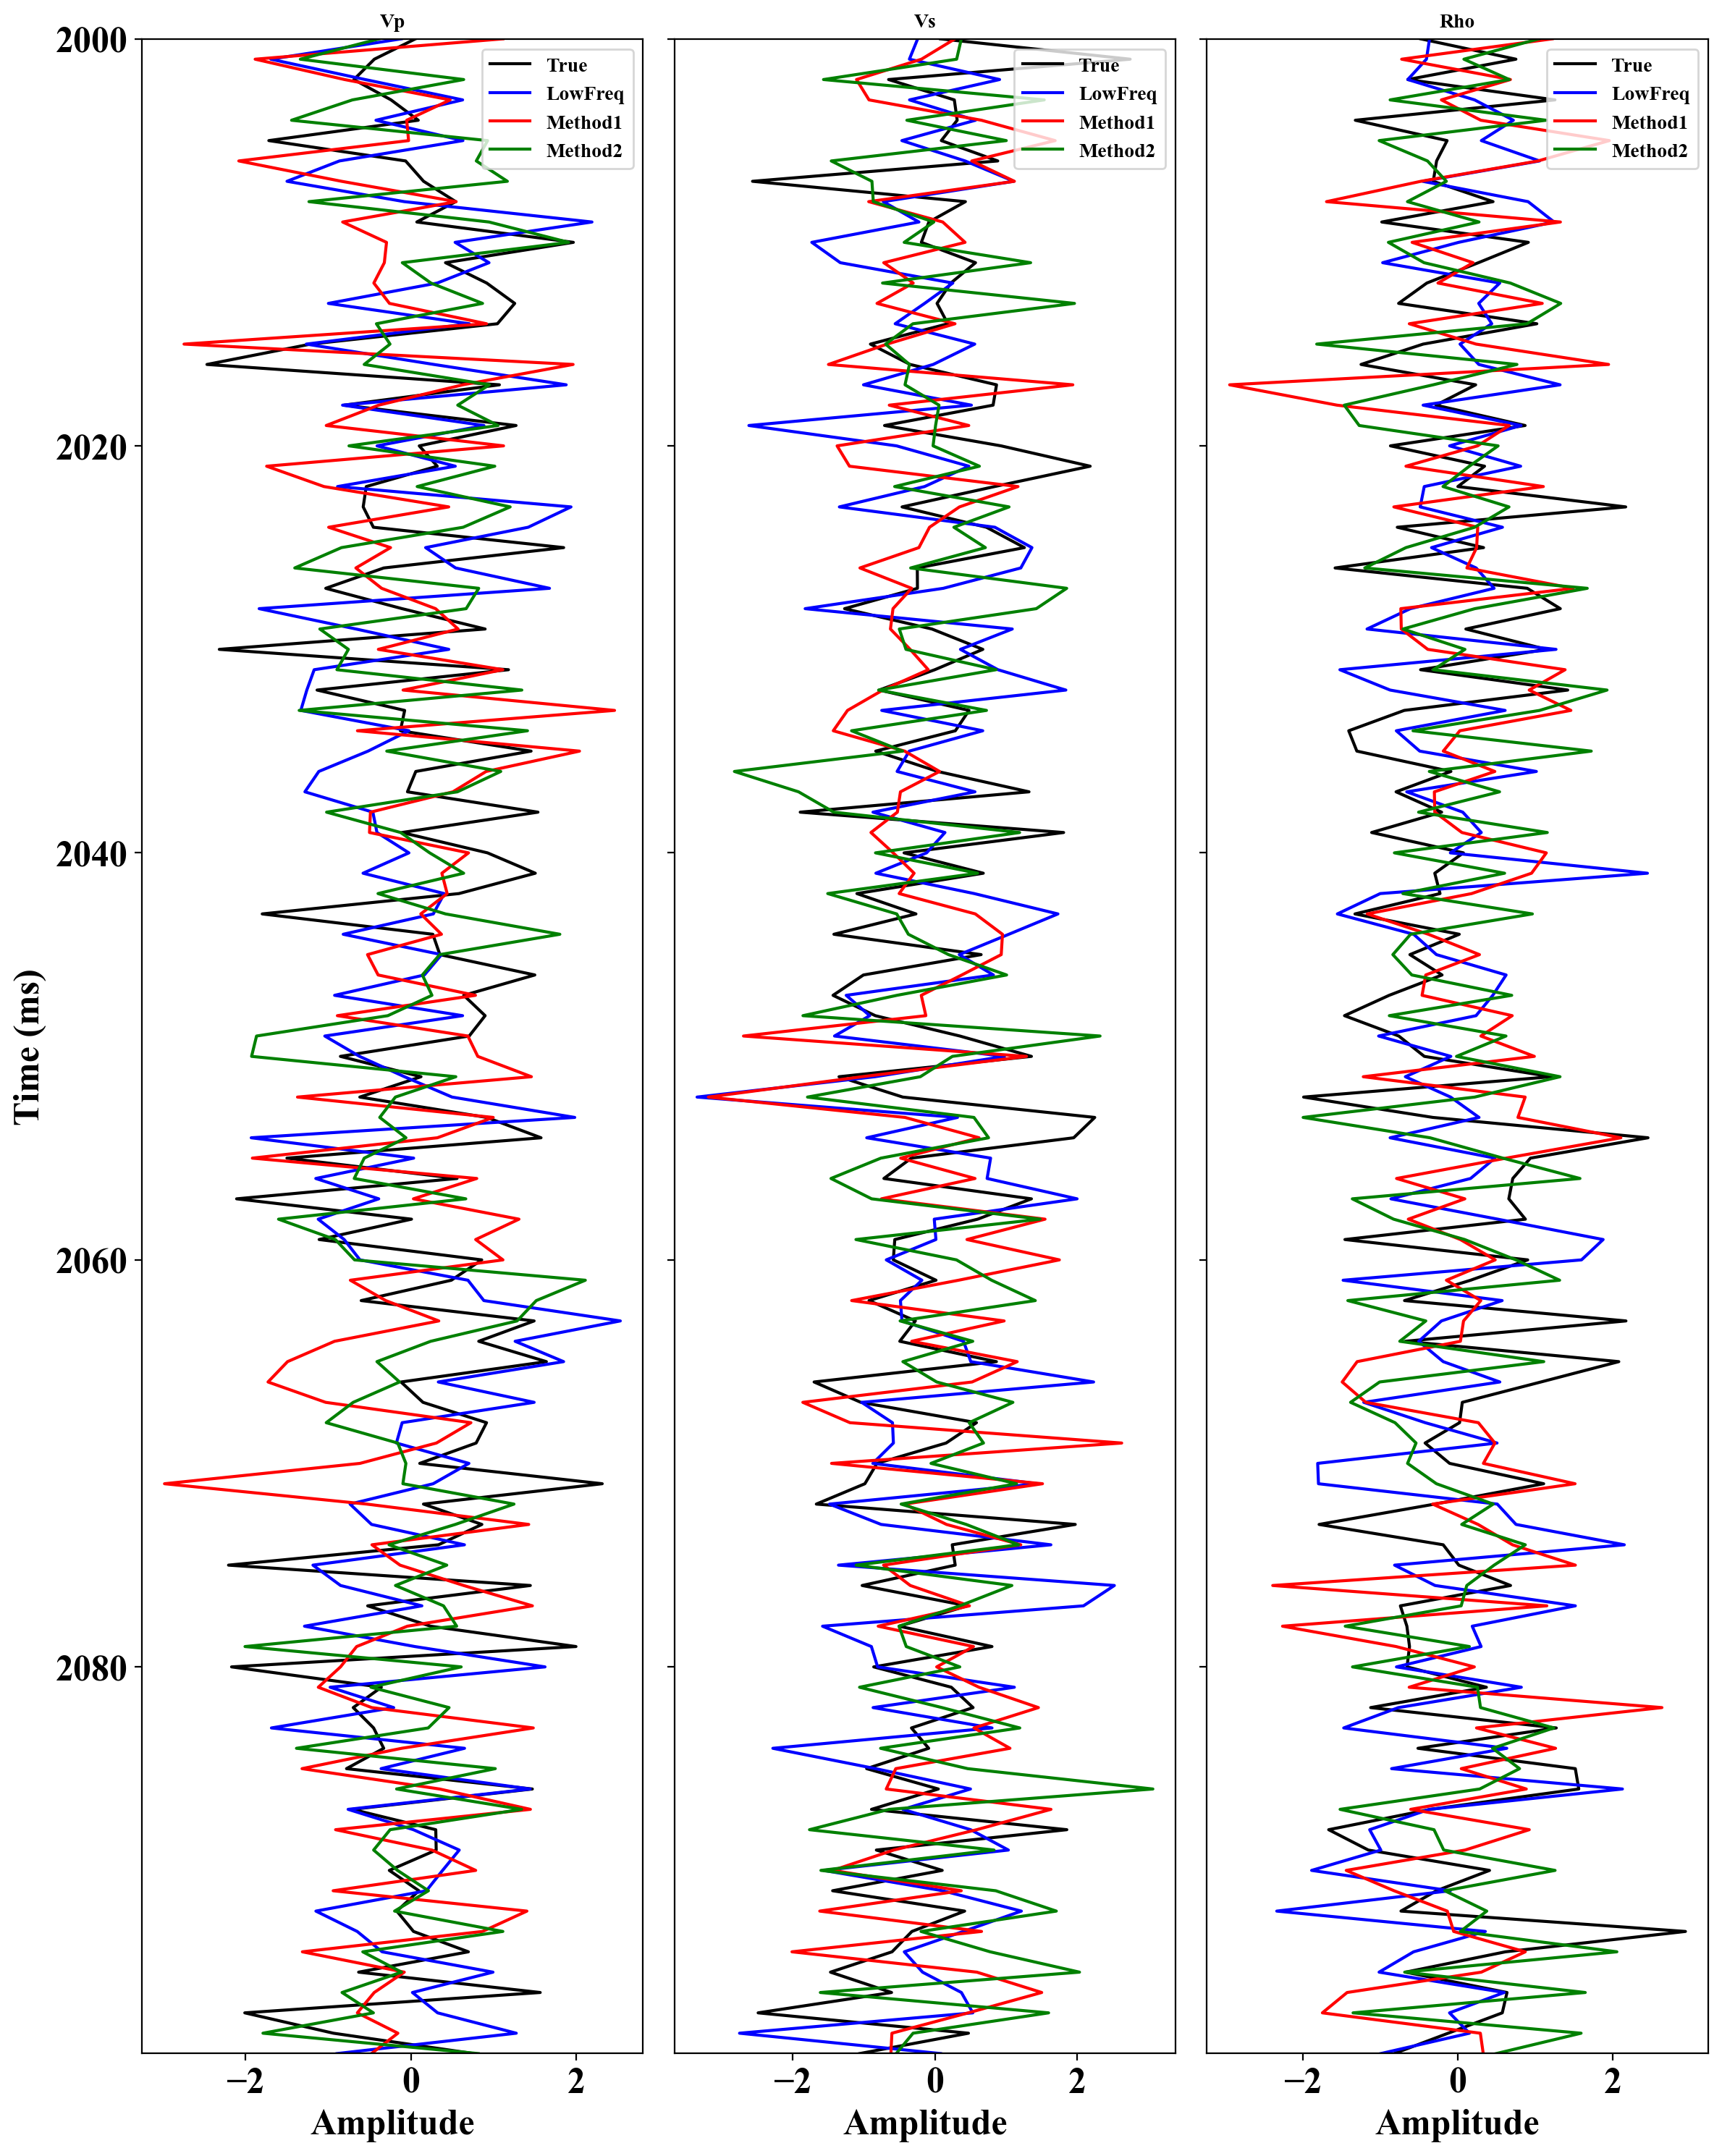

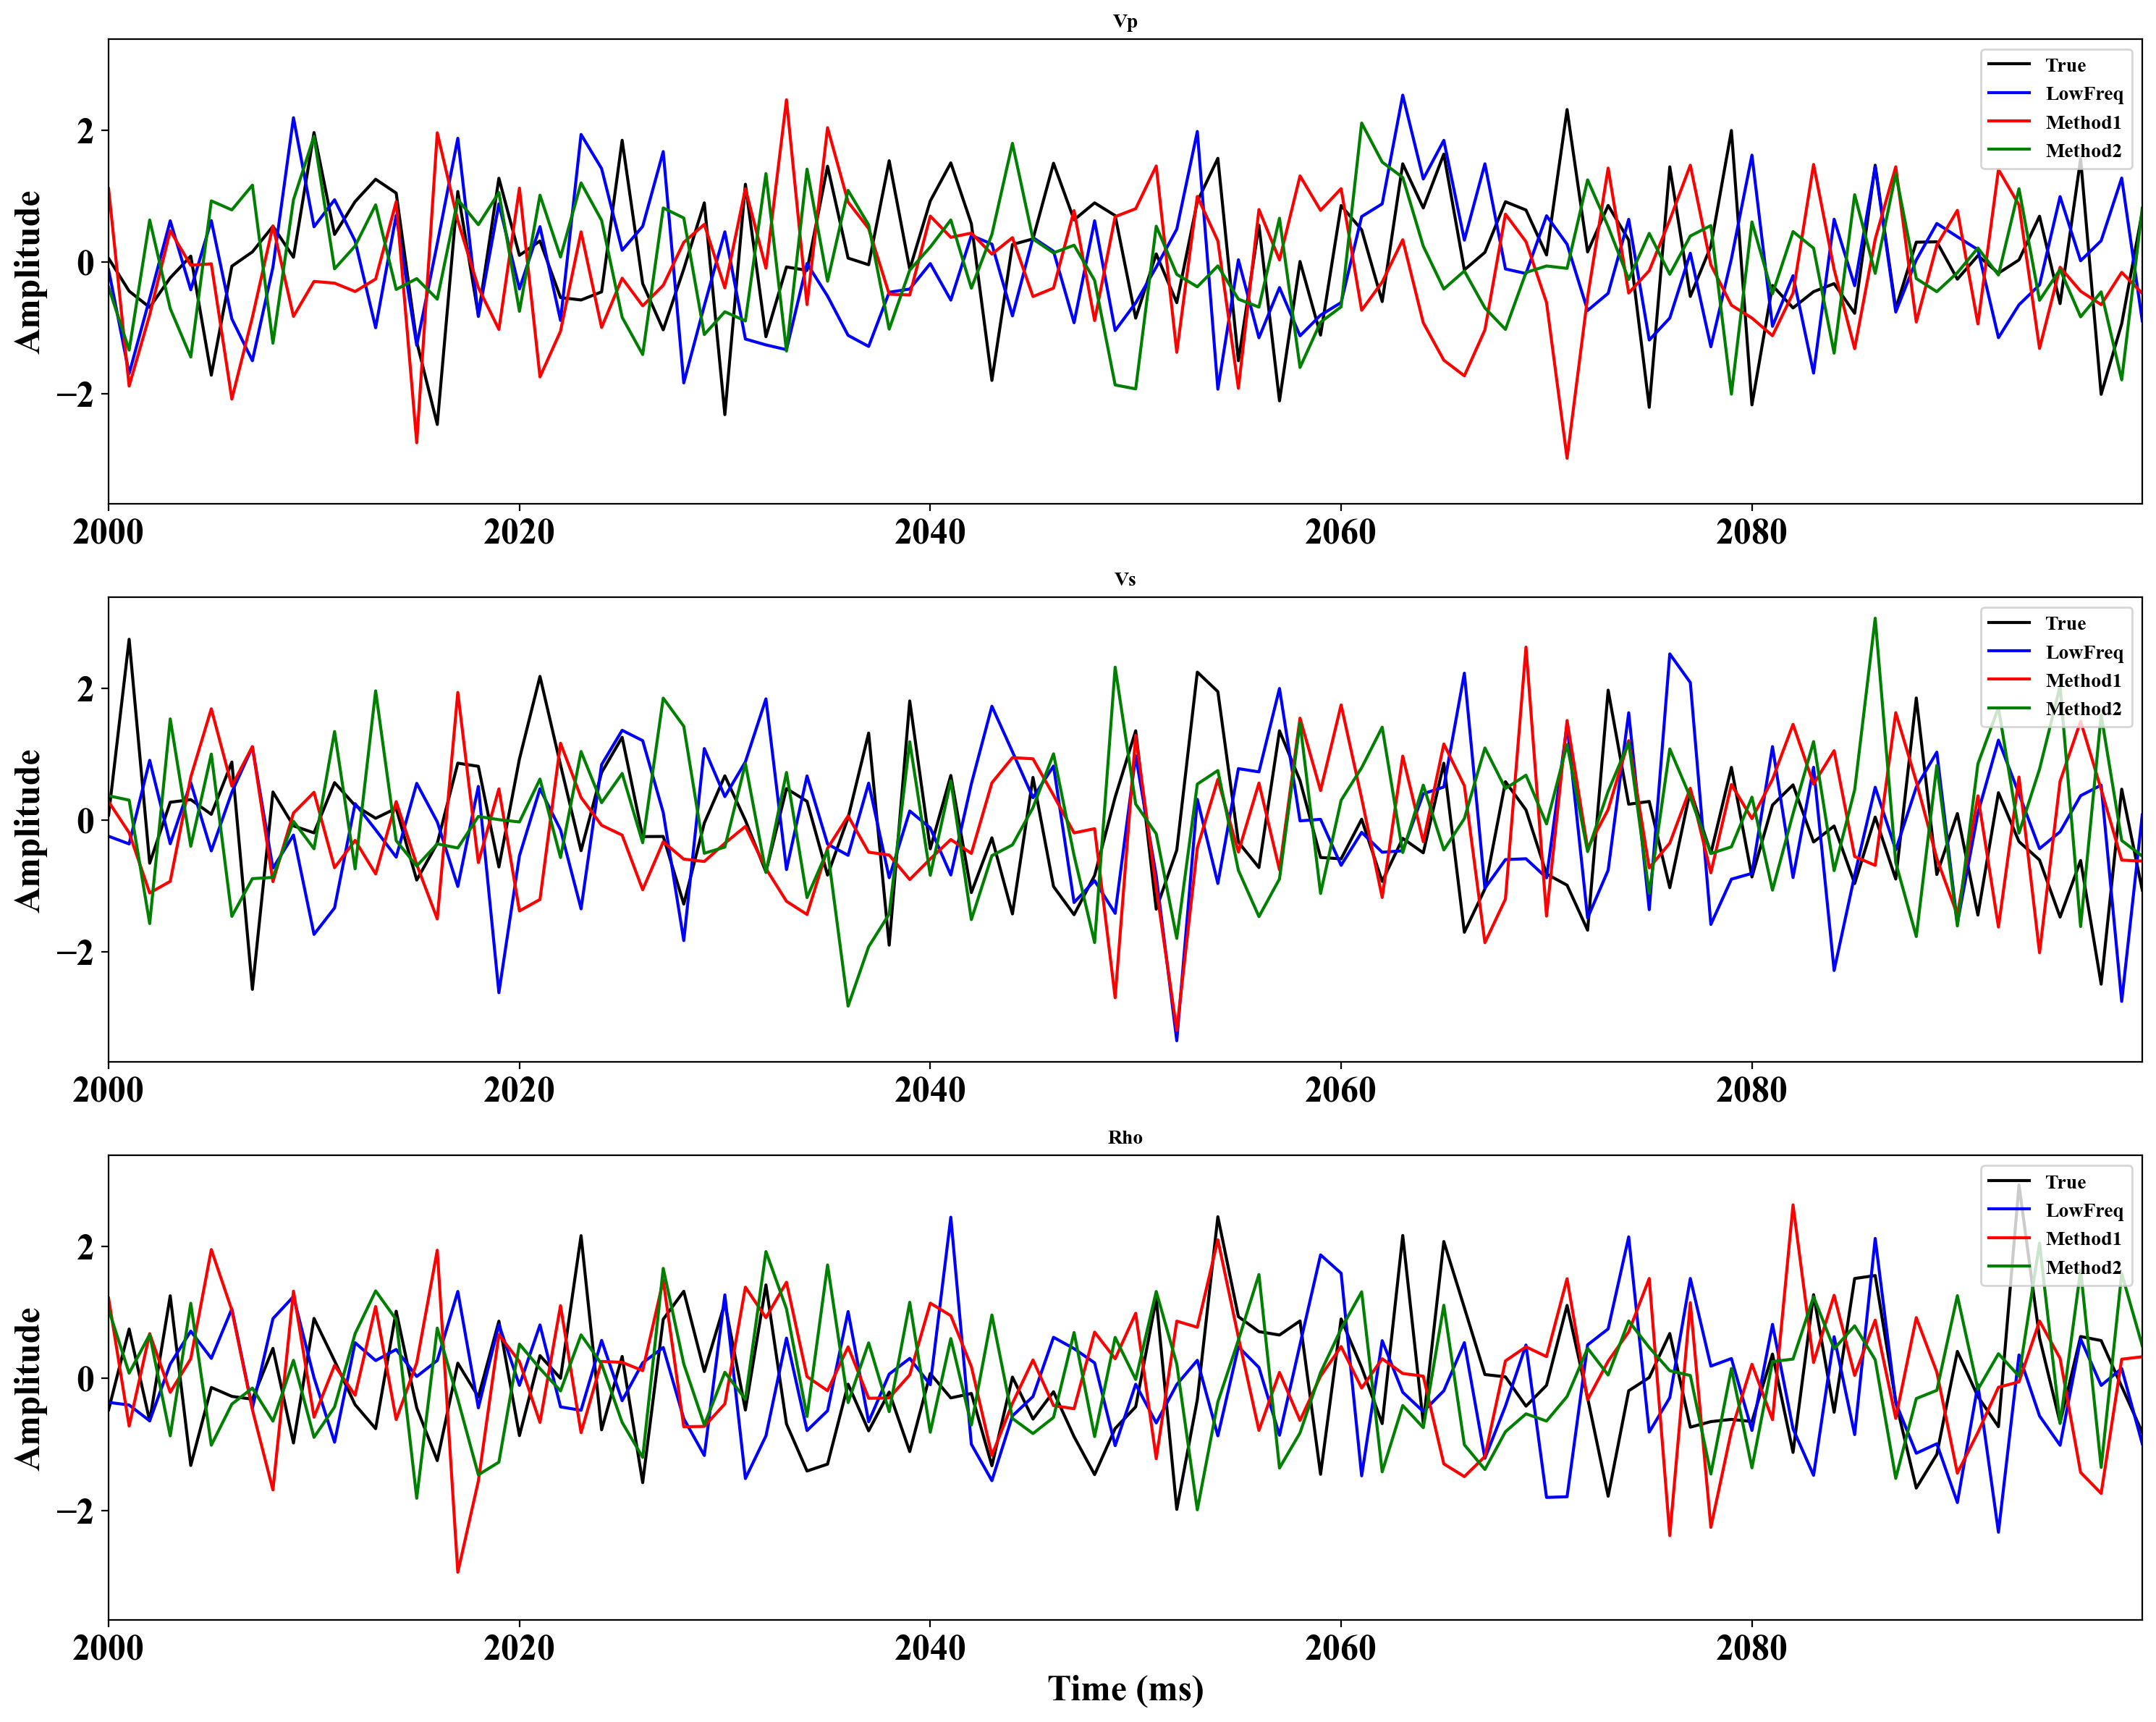

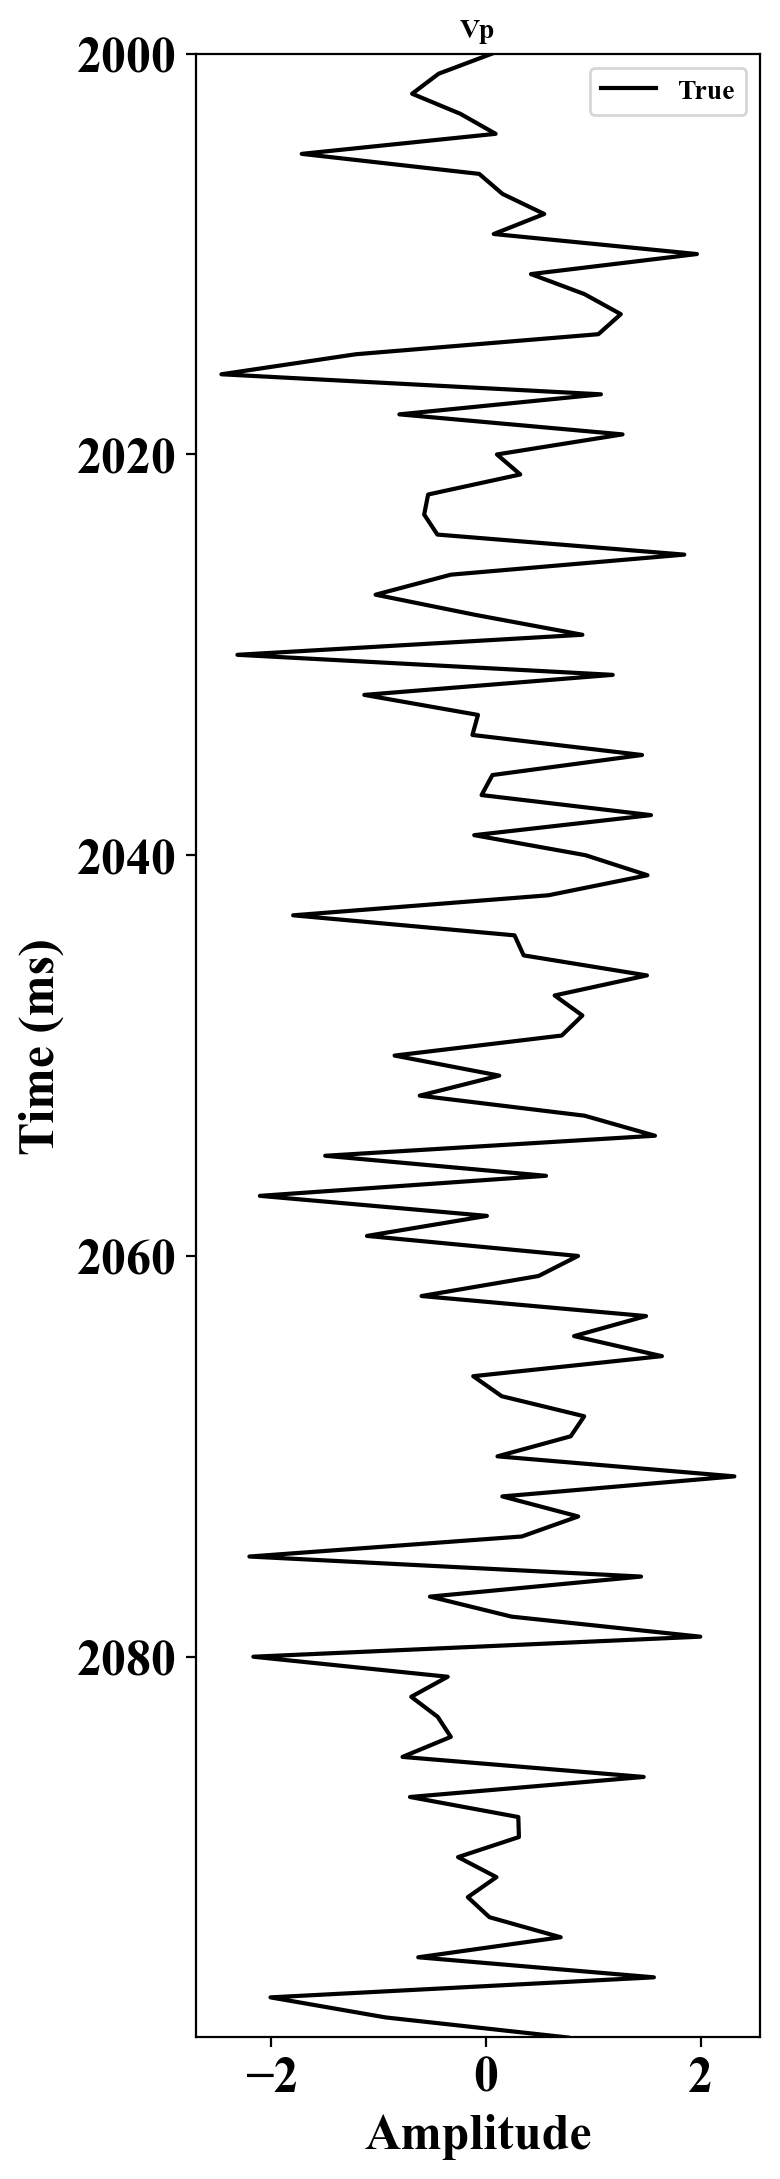

In [3]:
# Create a 1D seismic plot configuration object  
config1d = PlotConfig()
config1d.label_fontsize=18
config1d.tick_labelsize=18
config1d.legend_fontsize=10

# Initialize the 1D seismic plotter with the custom configuration
# Alternatively, use plot1d.Seis1DPlotter() to apply default settings
plotter1d = plot1d.Seis1DPlotter(config1d) 

# Example structure with three groups, each containing four property curves (e.g., True, LowFreq, Method1, Method2).
# Each curve is represented by a 1D array of 100 samples. Replace with your actual dataset if needed.
data_groups = [
    [np.random.randn(100) for _ in range(4)],
    [np.random.randn(100) for _ in range(4)],
    [np.random.randn(100) for _ in range(4)],
]

# Titles for each group (e.g., physical properties such as Vp, Vs, Rho)
titles = ['Vp', 'Vs', 'Rho']

# Legends for each curve within a group
legends = ['True', 'LowFreq', 'Method1', 'Method2']

# Plot all groups: each group will be displayed as a subplot with its corresponding title and legend
# Plot in vertical layout (default):
plotter1d.plot_groups(data_groups= data_groups,
                        figsize=(4, 15),
                        t_start=t[0],
                        titles=titles,
                        legends=legends)  
# Plot in horizontal layout:
plotter1d.plot_groups(data_groups= data_groups,
                        vis_type='h',
                        figsize=(15, 4),
                        t_start=t[0],
                        titles=titles,
                        legends=legends)    

# If you only want to plot a single curve (e.g., 'True' Vp only), you can pass a single array and labels
plotter1d.plot_groups(data_groups= data_groups[0][0],
                        t_start=t[0],
                        titles=titles[0],
                        legends=legends[0]) 

Section 2: Assemble DataCube （DataCube is used to manage 2D and 3D subsurface data in a unified structure）


In [4]:
# Initialize a new DataCube object to store and organize subsurface data
data_cube = DataCube()

# Add a 3D seismic volume (e.g., migrated amplitude data)
data_cube.add_seismic("Seis1", seismic_data)

# Add a 3D property volume (e.g., inverted impedance, porosity, etc.)
data_cube.add_property("Prop1", prop)

# Add interpreted geological horizons (as 2D surfaces)
data_cube.add_horizon("Top", top)
data_cube.add_horizon("Mid", mid)
data_cube.add_horizon("Base", base)

# Add well log data from multiple wells
data_cube.add_well("Well-1", well_1)
data_cube.add_well("Well-2", well_2)
data_cube.add_well("Well-3", well_3)
data_cube.add_well("Well-4", well_4)
data_cube.add_well("Well-5", well_5)

# Display a summary of the contents stored in the DataCube
data_cube.summary()


DataCube Information:
- seismic: ['Seis1']
- properties: ['Prop1']
- horizons: ['Top', 'Mid', 'Base']
- wells: ['Well-1', 'Well-2', 'Well-3', 'Well-4', 'Well-5']


Section 3: 2D Plot

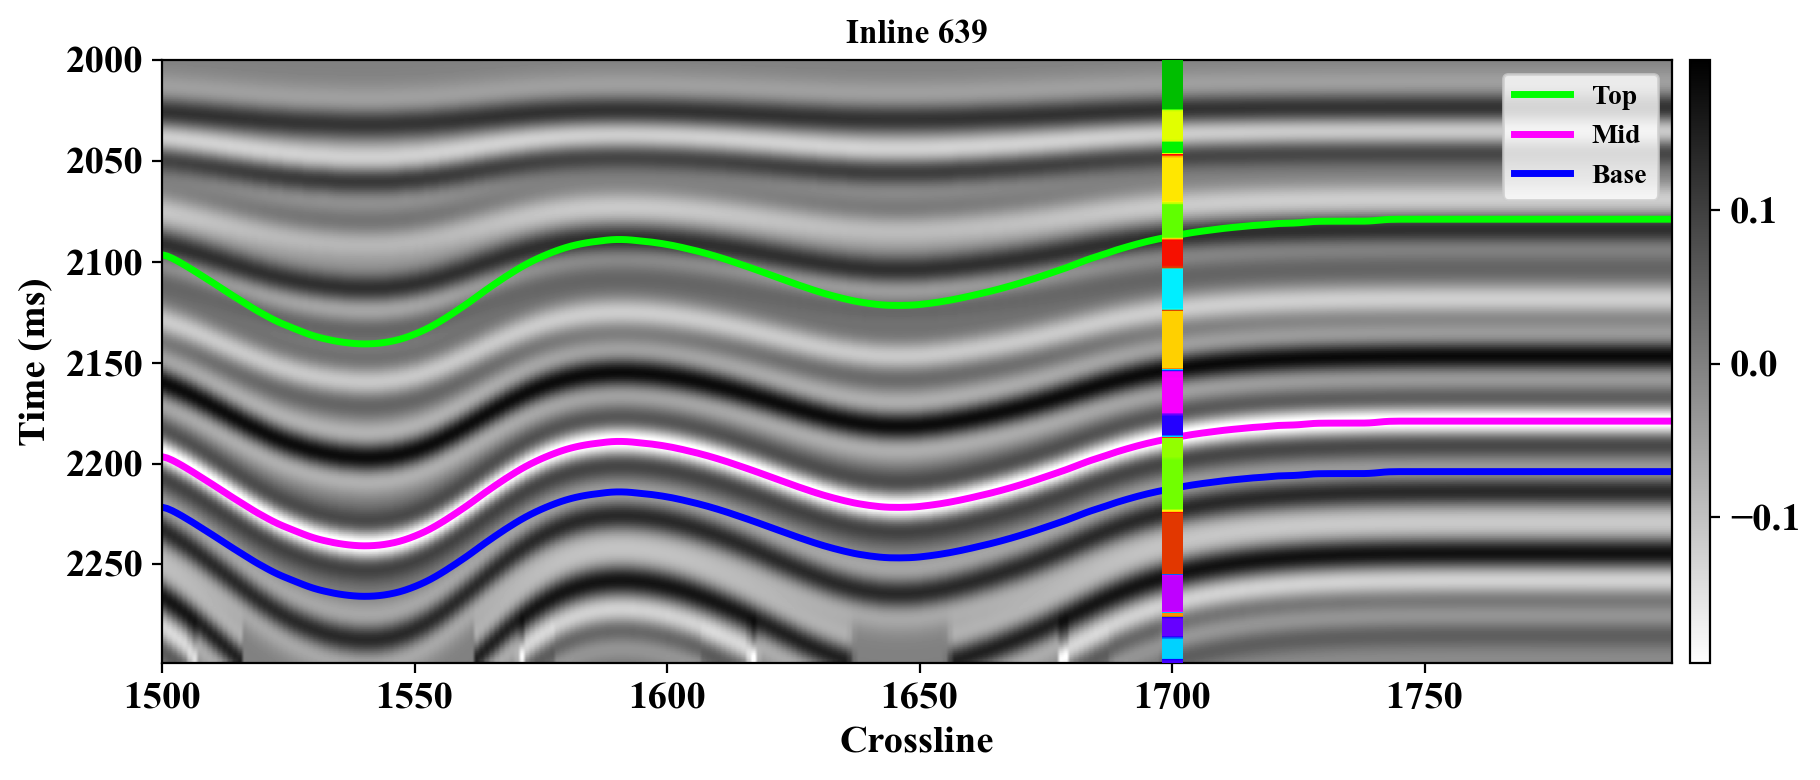

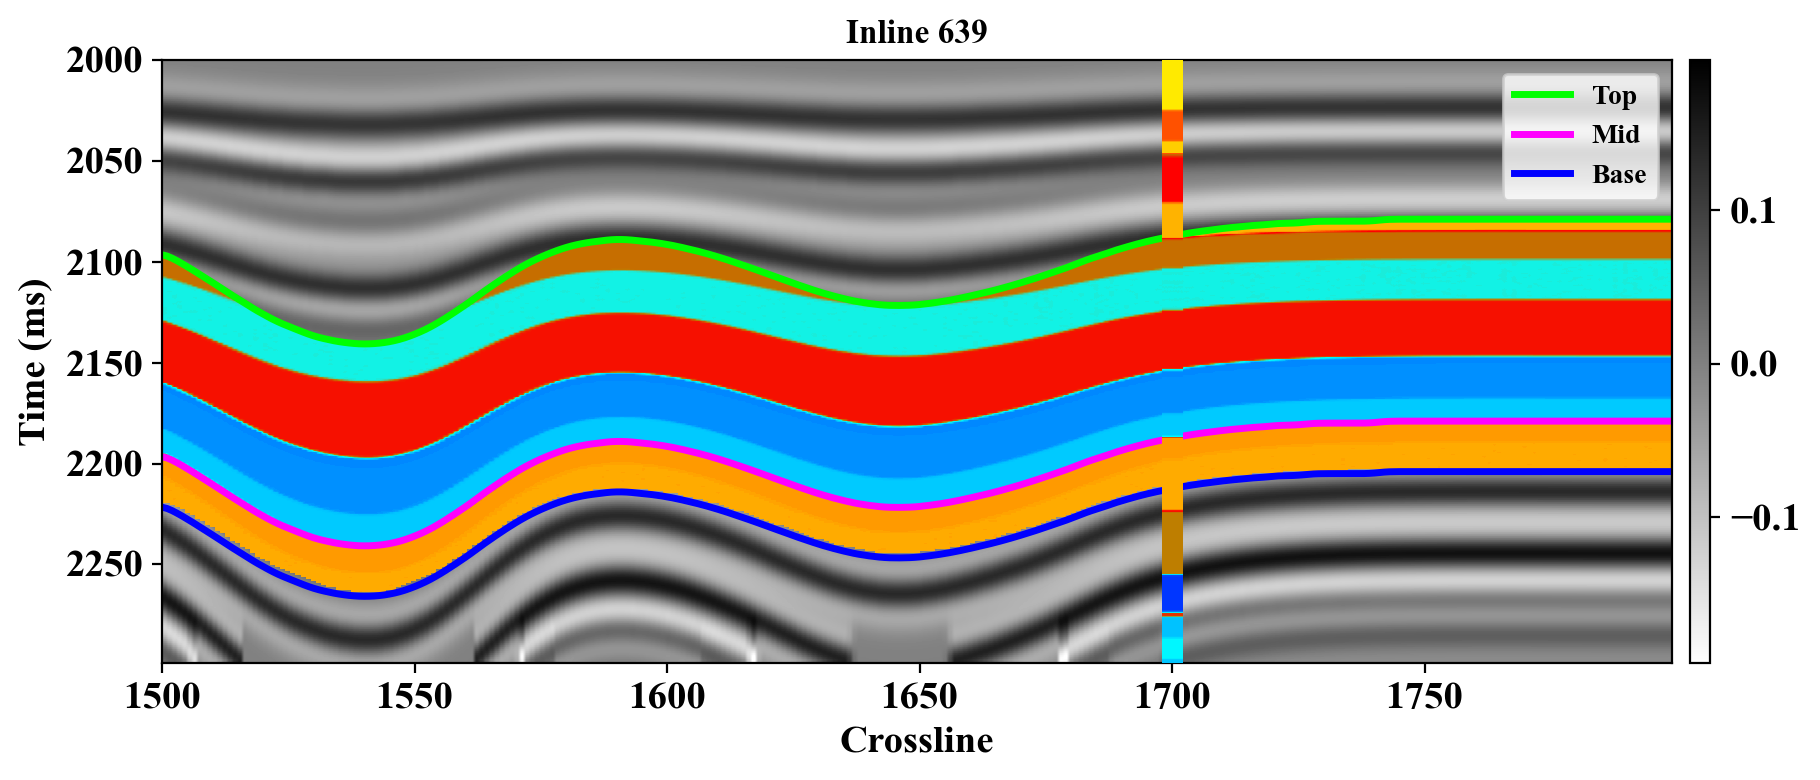

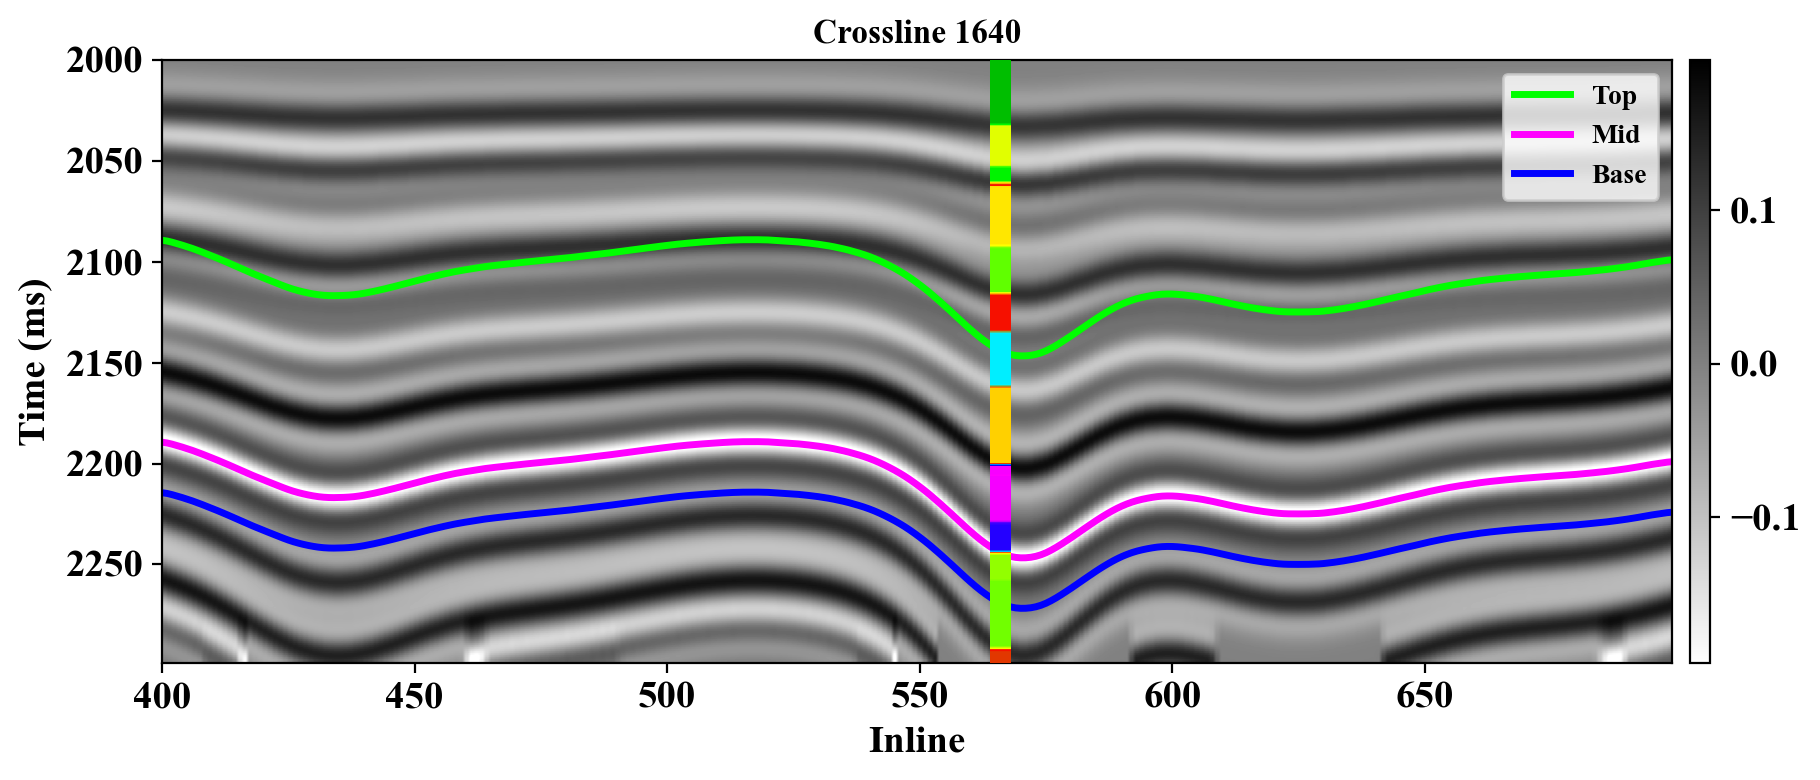

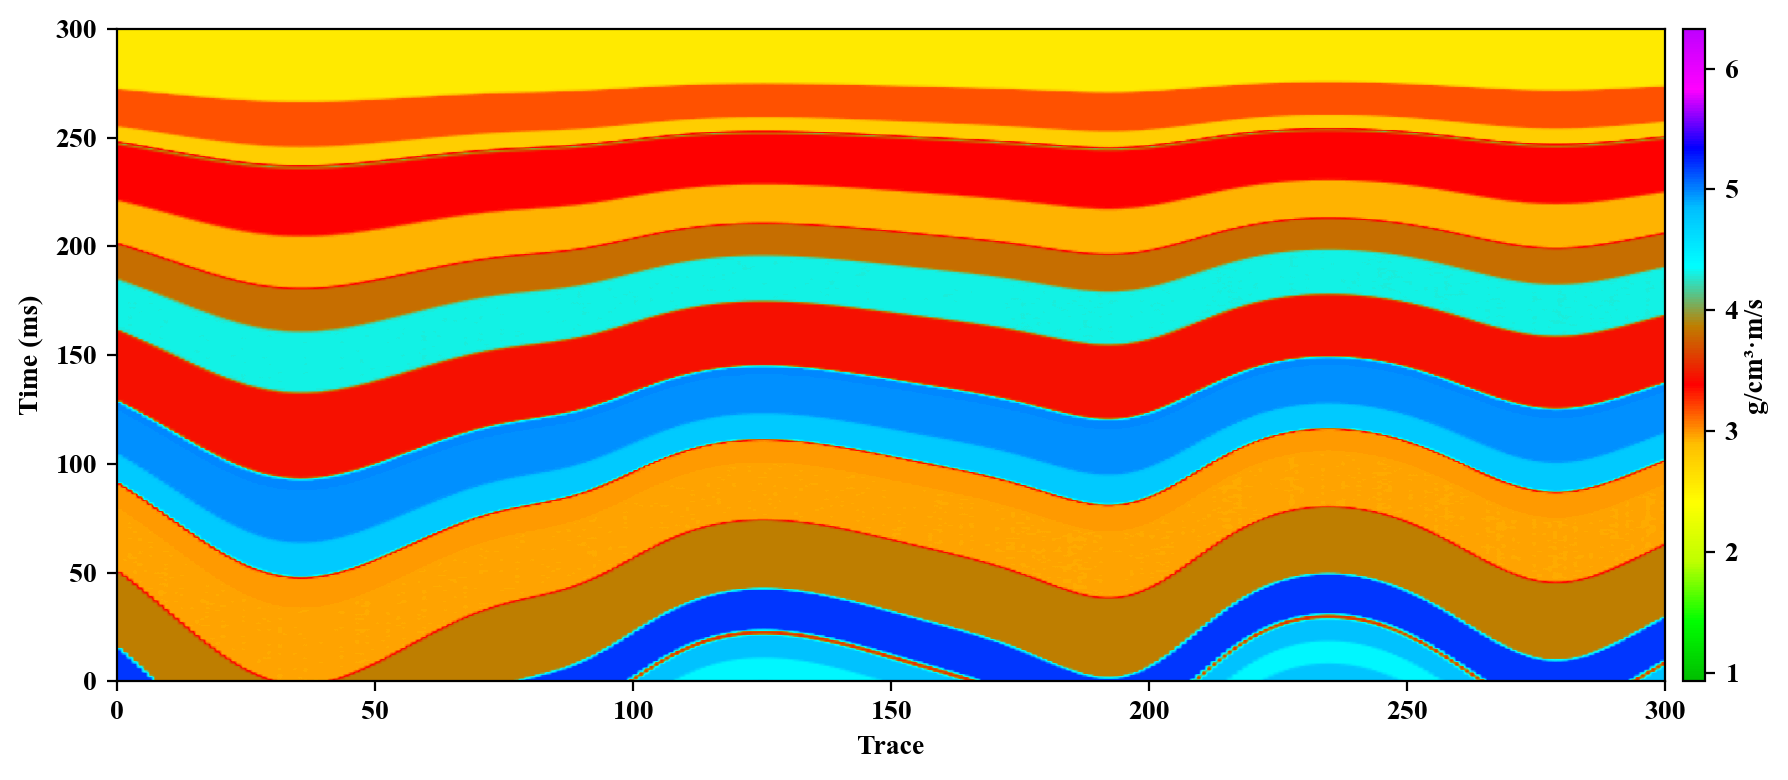

In [5]:
config2d = PlotConfig()
config2d.label_fontsize=14
config2d.tick_labelsize=14
config2d.title_fontsize=12
# config2d.cmaps()  # Print all available colormap names
# These colors match the OpendTect colormaps defined in opendtect_colormaps/ColTabs
# Set the data framework (spatial and temporal extents) as:
size = [il_start, il_end, xl_start, xl_end, t[-1], t[0]]
plotter2d = plot2d.Seis2DPlotter(data_cube, size, config2d)

# Seismic and Property display settings:
# - type: the name of the seismic data cube (e.g., 'Seis1')
# - cmap: the colormap used (e.g., grayscale)
# - clip: clipping method for color range (e.g., 'robust' or [your_min,your_max])
# - mask: whether to apply a mask (False = no masking, the mask is depended on two horizons)
# - bar: whether to show the colorbar (True = show)
show_seismic_type_2d = {'type':'Seis1', 'cmap':'Grey_scales', 'clip':'robust', 'mask':False, 'bar':True}
show_properties_type_2d = {'type':'Prop1', 'cmap':'AI', 'clip':'robust', 'mask':True, 'bar':False}

# Horizons display settings:
# - type: a list of horizons to display (e.g., Top, Mid, Base)
# - cmap and clip are not used here
show_horizons_type_2d = {'type':['Top', 'Mid', 'Base'], 'cmap':None, 'clip':None}

# Well display settings:
# - type: list of wells to display
# - cmap: color used for well logs
# - clip: there is default 
# - width: thickness of well logs
show_wells_type_2d = {'type':['Well-1', 'Well-2', 'Well-3', 'Well-4', 'Well-5'], 'cmap':'AI', 'clip':None, 'width':4}

# Plot inline section
plotter2d.plot_section(section_idx=639, section_type='inline', 
                       show_seismic_type=show_seismic_type_2d, 
                       show_horizons_type=show_horizons_type_2d,
                       show_wells_type=show_wells_type_2d
                           )

# Plot inline section with masked properties
plotter2d.plot_section(section_idx=639, section_type='inline', 
                       show_seismic_type=show_seismic_type_2d, 
                       show_properties_type=show_properties_type_2d,
                       show_horizons_type=show_horizons_type_2d,
                       show_wells_type=show_wells_type_2d
                           )

# Plot xline section
plotter2d.plot_section(section_idx=1640, section_type='xline', 
                       show_seismic_type=show_seismic_type_2d,
                       show_horizons_type=show_horizons_type_2d,
                       show_wells_type=show_wells_type_2d
                           )
# Use this block if working with 2D data instead of 3D seismic volume
plotter2d_new = plot2d.Seis2DPlotter(config2d)
plotter2d_new.plot_2d_section(prop[100,:,:].T, cmap='AI', clip='robust', unit_label='g/cm³·m/s')

In [7]:
config2d.cmaps()

Available color maps:
- AI
- Chimney
- Depth
- Grey_scales
- DHI
- Extremes
- Faults
- Greyn
- Flames
- Pastel
- Rainbow
- SunRise
- UVQs_Example_(5_Classes)
- HorizonCube
- Red_White_Black
- Red_White_Blue
- Seismics
- Grurple
- CCB
- Experimental
- Magic
- Brown_4grades
- Curvature
- Contour_Gradients
- Rainbow_Plus
- Tasty
- SandShale
- Lithology
- Pressure
- Interval_Velocity
- Porosity
- Dip
- Energy
- Depth1
- Similarity
- Double_Tasty
- Double_Rainbow
- Matteo_terrain_cube
- Matteo_terrain_cube_red
- Matteo_terrain_linear
- Petrel
- Depth_AS
- AI_NedMag
- Depth_Spectral
- OD_Seismic_1
- OD_Seismic_2
- OD_Seismic_3
- Viridis
- Plasma


Section 4: 3D Plot

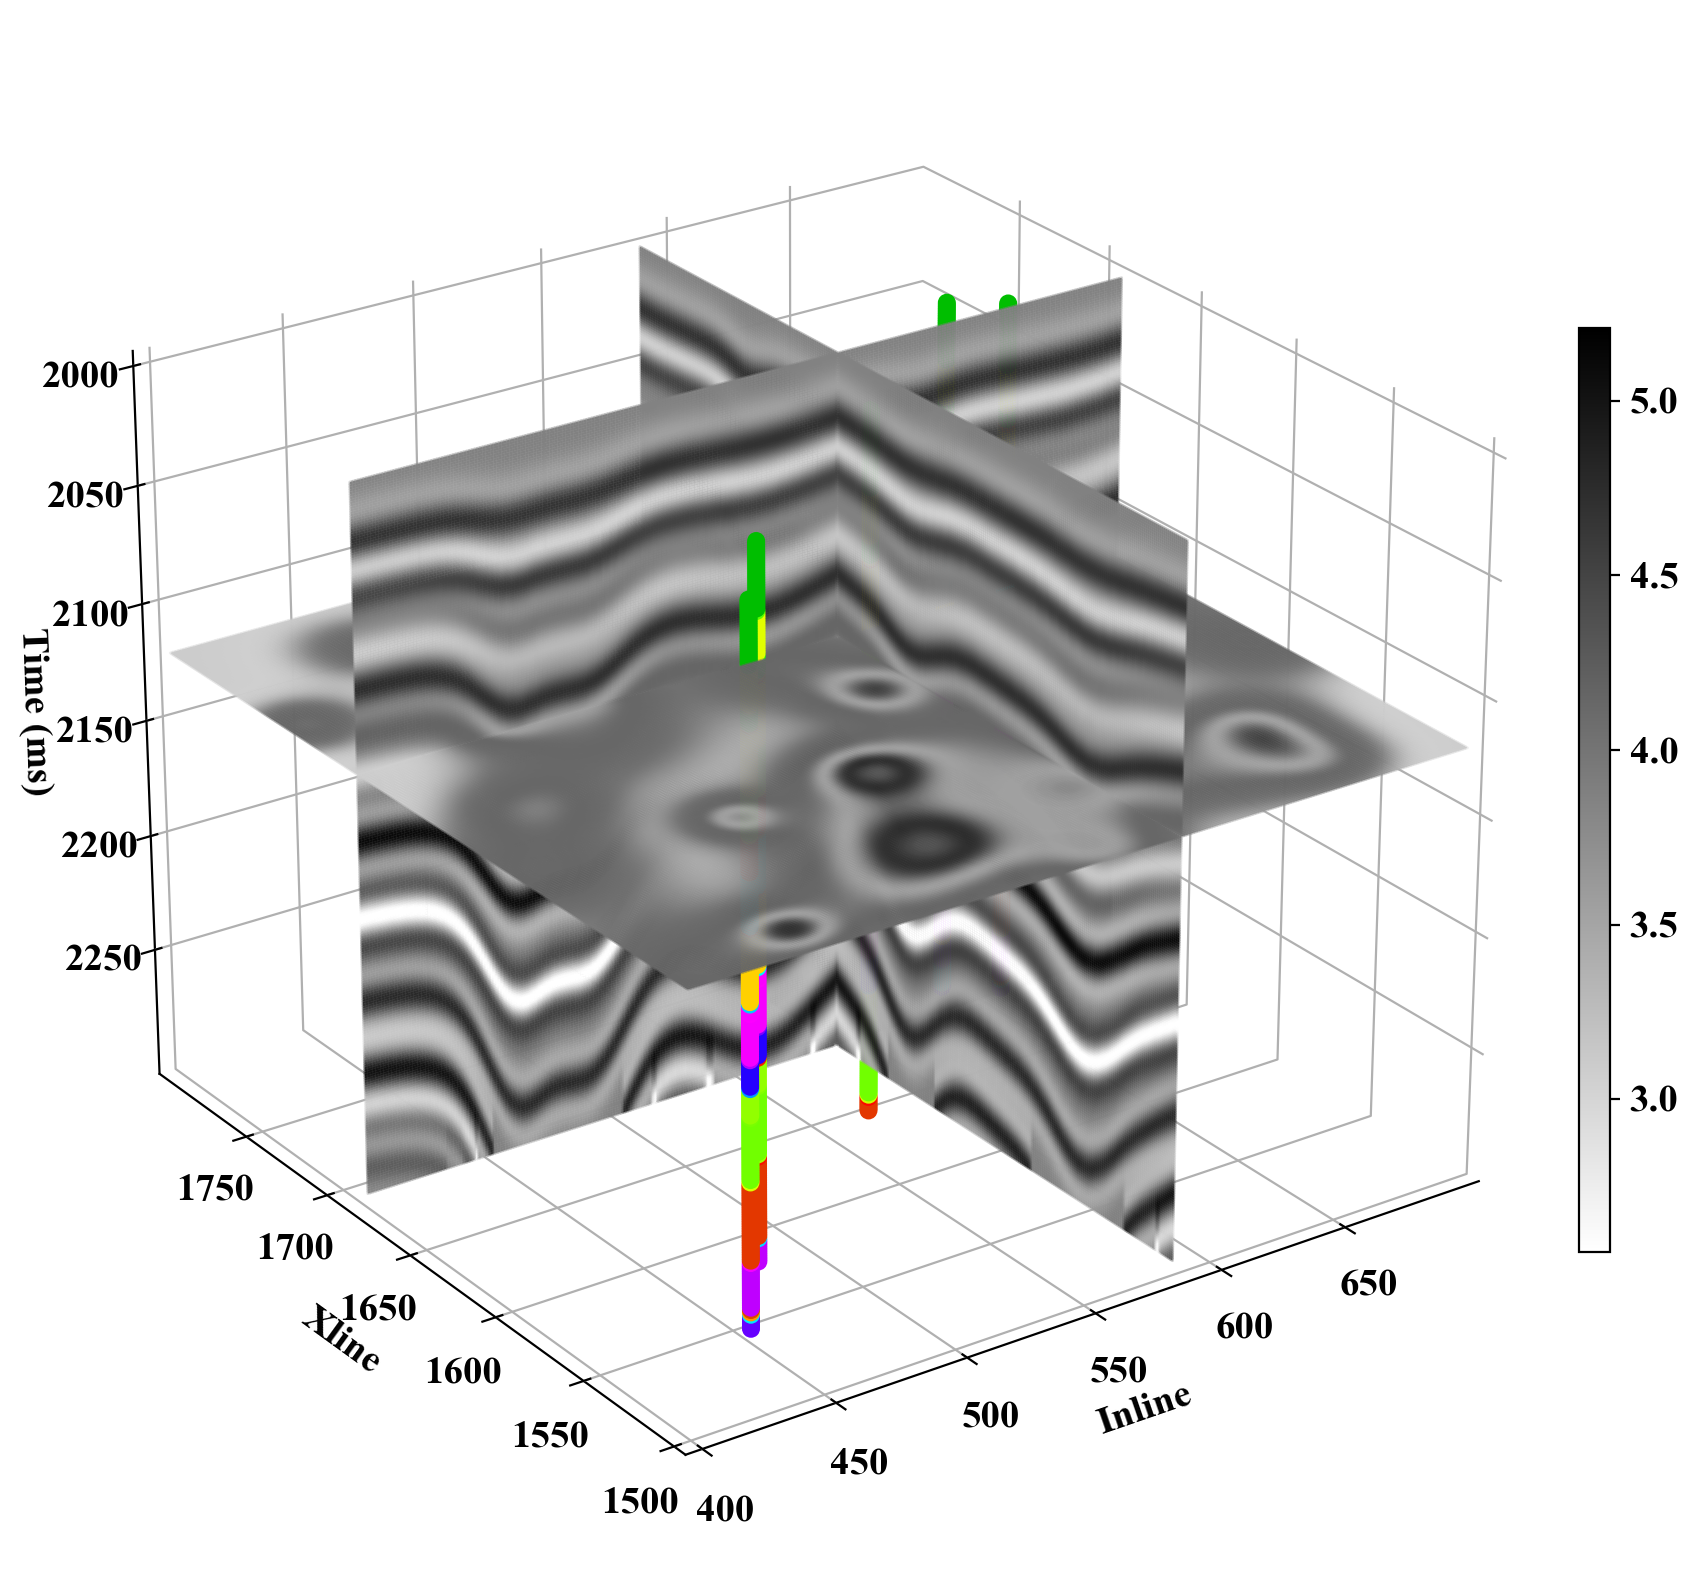

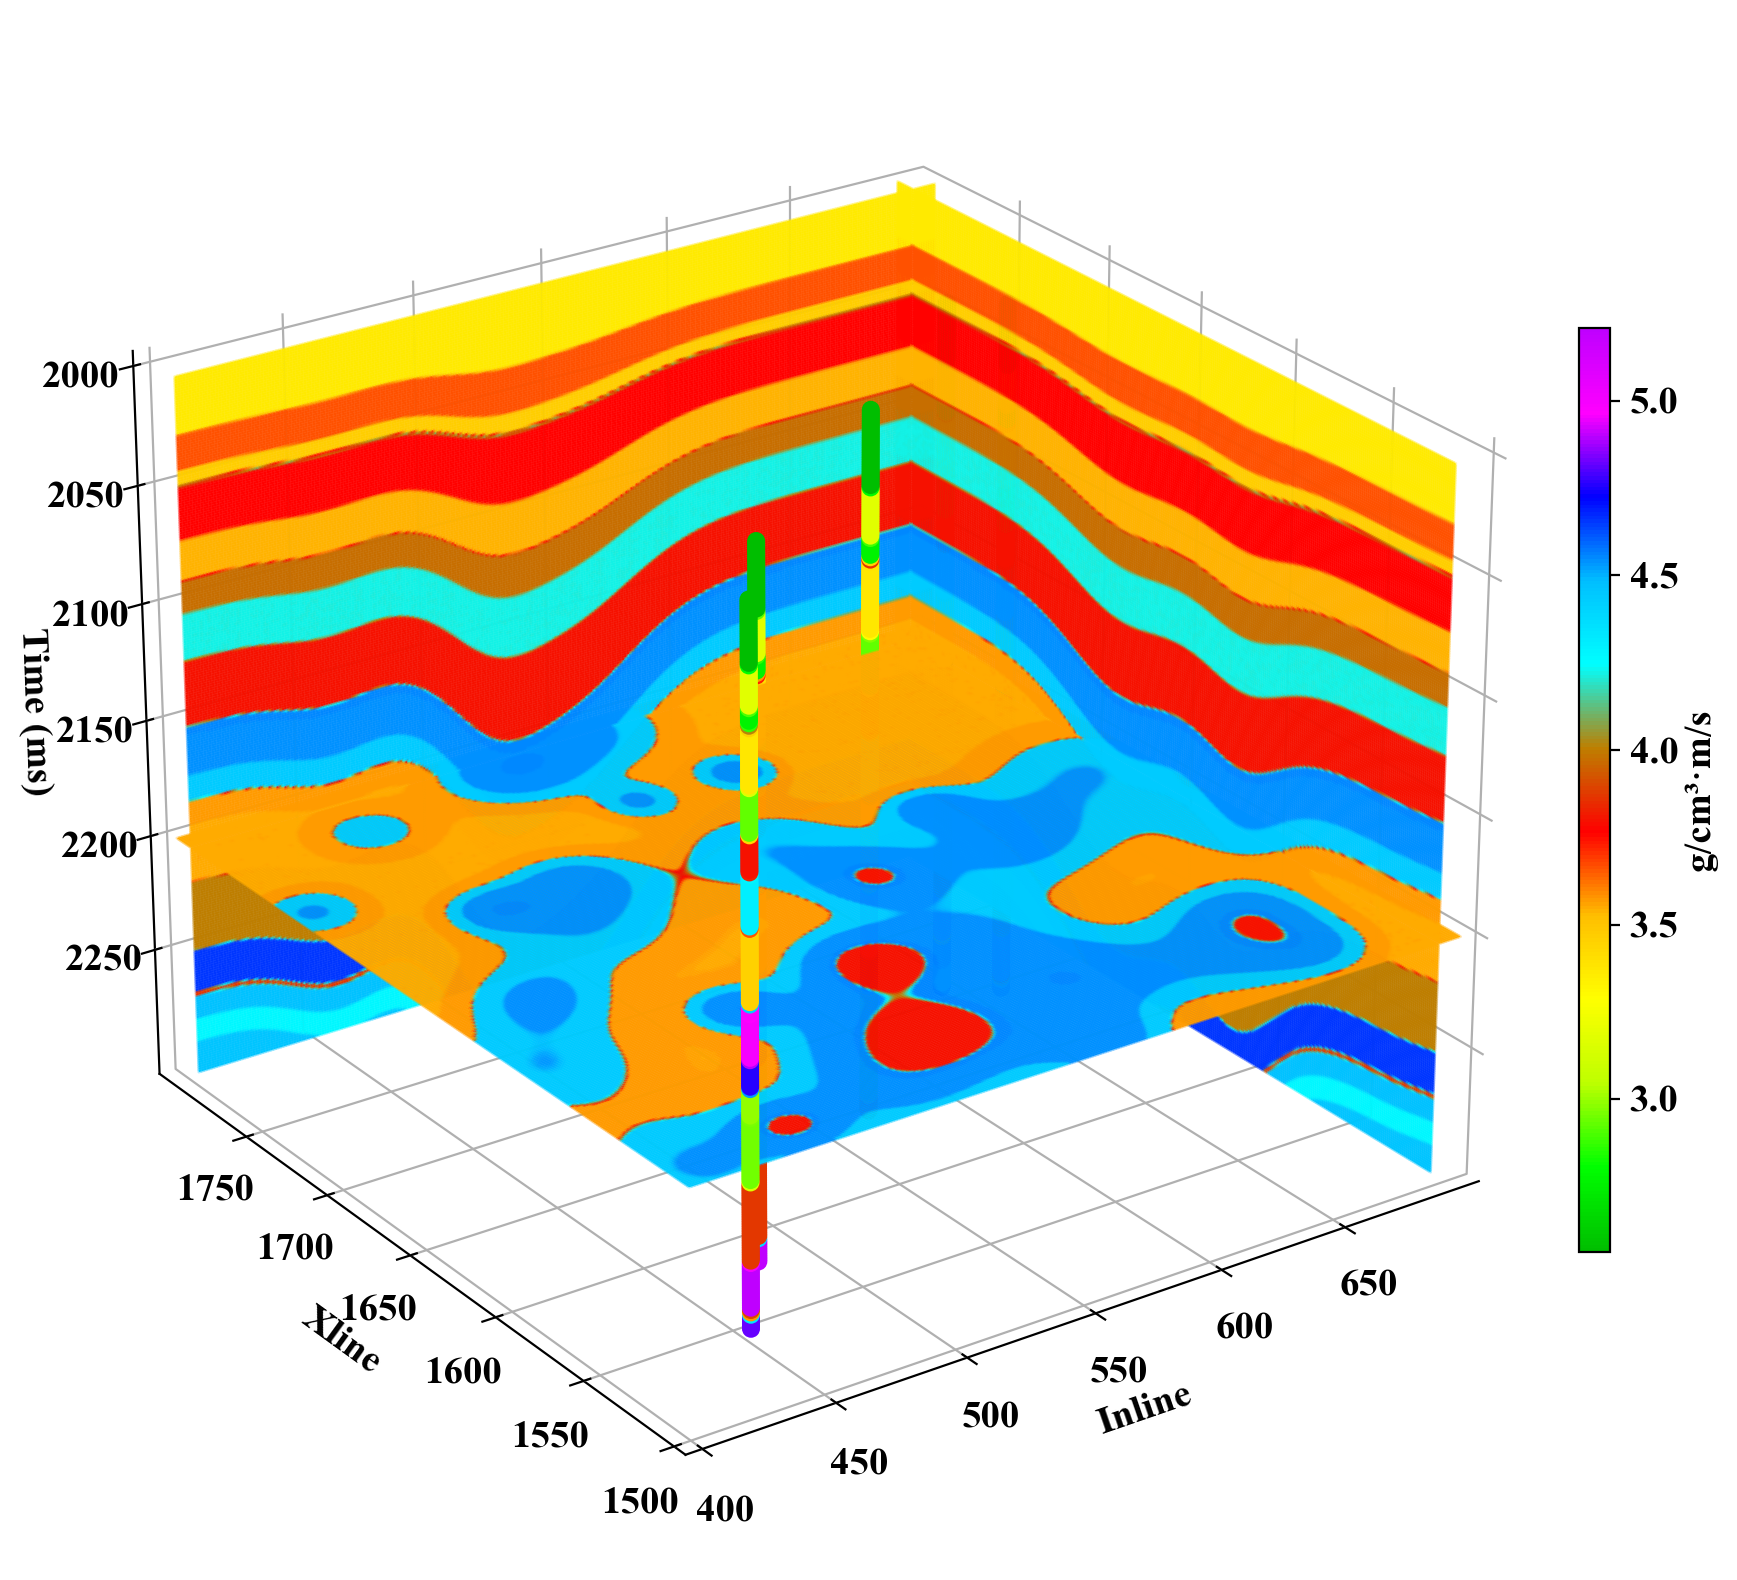

In [6]:
config3d = PlotConfig()
config3d.label_fontsize=14
config3d.tick_labelsize=14
plotter3d = plot3d.Seis3DPlotter(data_cube, size, config3d)
show_seismic_type_3d = {'type':'Seis1', 'cmap':'Grey_scales', 'clip':'robust'}
show_properties_type_3d = {'type':'Prop1', 'cmap':'AI', 'clip':'robust'}
show_wells_type_3d = {'type':['Well-1', 'Well-2', 'Well-3', 'Well-4', 'Well-5'], 'cmap':'AI', 'clip':None, 'width':30}

# Note: Only one of seismic or property can be visualized at a time in this version.
plotter3d.plot_slices(show_seismic_type=show_seismic_type_3d,
                      show_wells_type=show_wells_type_3d,
                      # pos = [680, 1780, 2200] 
                      ) 
# plotter3d.plot_slices(show_properties_type=show_properties_type_3d,
#                      show_wells_type=show_wells_type_3d,
#                      pos = [690, 1790, 2200], # default is 0.618*nx..
#                      unit_label='g/cm³·m/s'
#                      )
# The optimal slice and view positions are calculated automatically, but manual override is supported.
